https://coderefinery.github.io/jupyter/05-exercises/

In [4]:
import numpy as np
from ipywidgets import interact

import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)

def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y

def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit

def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()

x, y = noisy_gaussian()

@interact 
def slider(n=(3, 30)):
    yfit = fit(x, y, n=n)  # fit a 5th order polynomial to it
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

88.8 ms ± 3.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


UsageError: Line magic function `%%prun` not found.


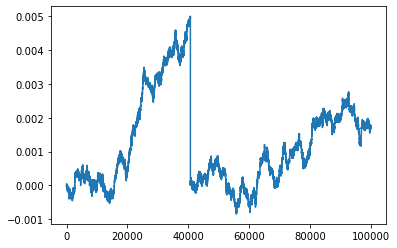

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def step():
    import random
    return 1. if random.random() > .5 else -1.

def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

n = 100000
x = walk(n)

import matplotlib.pyplot as plt
plt.plot(x);

t1 = %timeit -o walk(n)
t1.best
%%prun
walk(n)

In [11]:
%load_ext line_profiler

import numpy as np
import matplotlib.pyplot as plt

def step():
    import random
    return 1. if random.random() > .5 else -1.

def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

n = 100000
x = walk(n)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


!pip install line_profiler

In [13]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:
  %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These stat

In [14]:
%lprun -f walk walk(10000)

Timer unit: 1e-07 s

Total time: 0.0527515 s
File: <ipython-input-11-15550f69fcd7>
Function: walk at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           def walk(n):
    11         1       2039.0   2039.0      0.4      x = np.zeros(n)
    12         1         45.0     45.0      0.0      dx = 1. / n
    13     10000      67559.0      6.8     12.8      for i in range(n - 1):
    14      9999     269646.0     27.0     51.1          x_new = x[i] + dx * step()
    15      9999      88705.0      8.9     16.8          if x_new > 5e-3:
    16                                                       x[i + 1] = 0.
    17                                                   else:
    18      9999      99516.0     10.0     18.9              x[i + 1] = x_new
    19         1          5.0      5.0      0.0      return x